<a href="https://colab.research.google.com/github/daniel-neves-dev/alura_store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from prettytable import PrettyTable


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url1)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [2]:
URLS = [url1, url2, url3, url4]

def load_stores(urls) -> pd.DataFrame:
    """ Load stores from a list of stores"""

    df = pd.read_csv(urls, index_col=0)
    return df

stores = {f'Loja{i+1}': load_stores(u) for i, u in enumerate(URLS)}

#1. Análise do faturamento


In [3]:
revenues = {store_name: (sum(df['Preço'])) for store_name, df in stores.items()}
df_revenue = (pd.DataFrame(revenues.items(), columns=['Loja', 'Preço'])
               .rename(columns={'Preço':'Faturamento'}))

In [4]:
def plot_tabel_revenue(revenue_df: pd.DataFrame)->None:
    """ Plot the total revenues for all stores """

    """
        Enter with the revenue in data frame format
    """

    tabel = PrettyTable(['Loja', 'Faturamento'])
    for _, row in revenue_df.iterrows():
        tabel.add_row([
            row['Loja'],
            f"R${row['Faturamento']:,.2f}".replace(',', 'x').replace('.', ',').replace('x', '.')
        ])

    title = 'Faturamento por loja'
    tabel_str = tabel.get_string(fontsize = 22)
    width = len(tabel_str.splitlines()[0])

    print('\n' + title.center(width))
    print(tabel_str)

In [5]:
plot_tabel_revenue(df_revenue)


   Faturamento por loja   
+-------+----------------+
|  Loja |  Faturamento   |
+-------+----------------+
| Loja1 | R$1.534.509,12 |
| Loja2 | R$1.488.459,06 |
| Loja3 | R$1.464.025,03 |
| Loja4 | R$1.384.497,58 |
+-------+----------------+


##1. Análise do faturamento - Gráfico

In [6]:
def plot_revenue_bar_graph(revenue_df: pd.DataFrame)->None:
    fig, axs = plt.subplots(figsize=(10,6))
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

    labels = [lbl for lbl in revenue_df['Loja']]
    values = [va/1e6 for va in revenue_df['Faturamento']]


    bars = axs.bar(labels, values, color = bar_colors, width=0.5)
    axs.bar_label(bars, labels=[f'{vl:.2f} M' for vl in values], fontsize = 12)
    axs.set_title('Faturamento total de cada loja em milhões', fontsize = 12, fontweight= 'bold')

    axs.set_xticks(range(len(labels)))
    axs.set_xticklabels(labels, fontsize = 12)

    axs.yaxis.set_visible(False)
    axs.spines[['top', 'left', 'right']].set_visible(False)

    plt.show()

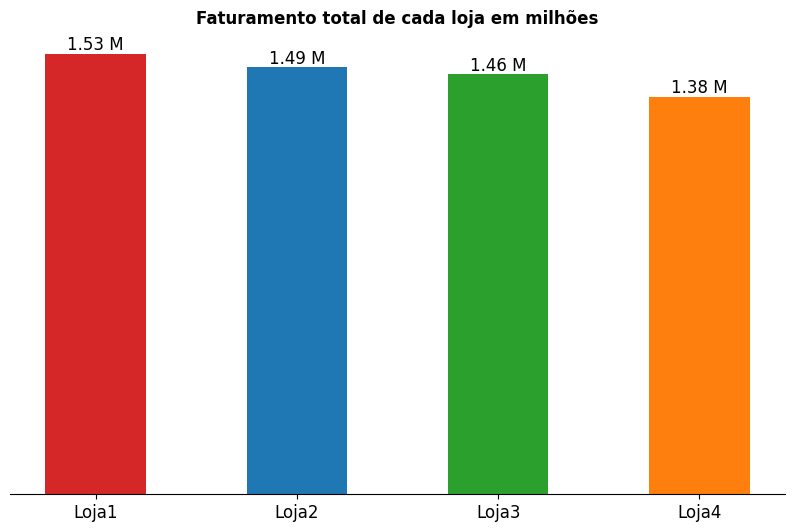

In [7]:
plot_revenue_bar_graph(df_revenue)

# 2. Vendas por Categoria


In [8]:
categories = {store_name: df.groupby('Categoria do Produto').size()
            .reset_index(name='Quantidade')
            .rename(columns = {'Categoria do Produto':'Categoria'})
            for store_name, df in stores.items()}

In [9]:
def plot_table_categories_most_sell(dict_categories)->None:
    """  Plot store products category most sold """

    table = PrettyTable(['Loja', 'Categoria', 'Quantidade'])
    for store, df in dict_categories.items():
        max_row = df.loc[df['Quantidade'].idxmax()]
        table.add_row([
            store,
            max_row['Categoria'],
            f"{max_row['Quantidade']} Unidades"
        ])

    title = 'Categoria mais vendida'
    table_str = table.get_string()
    width = len(table_str.splitlines()[0])

    print('\n' + title.center(width))
    print(table_str)

In [10]:
plot_table_categories_most_sell(categories)


       Categoria mais vendida       
+-------+-----------+--------------+
|  Loja | Categoria |  Quantidade  |
+-------+-----------+--------------+
| Loja1 |   moveis  | 465 Unidades |
| Loja2 |   moveis  | 442 Unidades |
| Loja3 |   moveis  | 499 Unidades |
| Loja4 |   moveis  | 480 Unidades |
+-------+-----------+--------------+


In [11]:
def plot_table_categories_least_sell(dict_categories:dict) -> None:
    """  Plot store products category least sold """

    table = PrettyTable(['Loja', 'Categoria', 'Quantidade'])
    for store, df in dict_categories.items():
        min_row = df.loc[df['Quantidade'].idxmin()]
        table.add_row([
            store,
            min_row['Categoria'],
            f"{min_row['Quantidade']} Unidades"
        ])

    title = 'Categoria menos vendida'
    table_str = table.get_string()
    width = len(table_str.splitlines()[0])

    print('\n' + title.center(width))
    print(table_str)

In [12]:
plot_table_categories_least_sell(categories)


            Categoria menos vendida             
+-------+-----------------------+--------------+
|  Loja |       Categoria       |  Quantidade  |
+-------+-----------------------+--------------+
| Loja1 | utilidades domesticas | 171 Unidades |
| Loja2 | utilidades domesticas | 181 Unidades |
| Loja3 | instrumentos musicais | 177 Unidades |
| Loja4 | instrumentos musicais | 170 Unidades |
+-------+-----------------------+--------------+


##2 Categorias mais e menos vendidas - Gráfico

In [13]:
def most_least_category_sold(name_category:pd.DataFrame, name_store:str) -> list:
    """  Return a list of the most and least sold category """

    max_row = name_category.loc[name_category['Quantidade'].idxmax()]
    min_row = name_category.loc[name_category['Quantidade'].idxmin()]

    frame = [
        (f"{name_store}\nCategoria: {max_row['Categoria']}", max_row['Quantidade']),
        (f"{name_store}\nCategoria: {min_row['Categoria']}", min_row['Quantidade'])
    ]

    return frame

def plot_category_sell_bar_graph(list_data:list) -> None:
    """ Plot bar chart for most and least category selling"""
    labels, values = zip(*list_data)
    fig, axs = plt.subplots(figsize=(12,8))

    bar_colors = ['tab:blue', 'tab:red']

    bars = axs.bar(labels, values, width=0.8, color=bar_colors)
    axs.bar_label(bars, fontsize = 12)
    axs.spines[['top', 'left', 'right']].set_visible(False)
    axs.set_title('Vendas por categoria\nTotal em unidades', fontsize = 14, fontweight='bold')
    axs.yaxis.set_visible(False)

    axs.set_xticks(range(len(labels)))
    axs.set_xticklabels(labels, rotation=20, ha="right", fontsize=12)

    legend_elements = [
        Patch(facecolor="tab:blue", label="Mais vendido"),
        Patch(facecolor="tab:red",  label="Menos vendido")
    ]
    axs.legend(handles=legend_elements, loc="upper right")

    plt.tight_layout()
    plt.show()

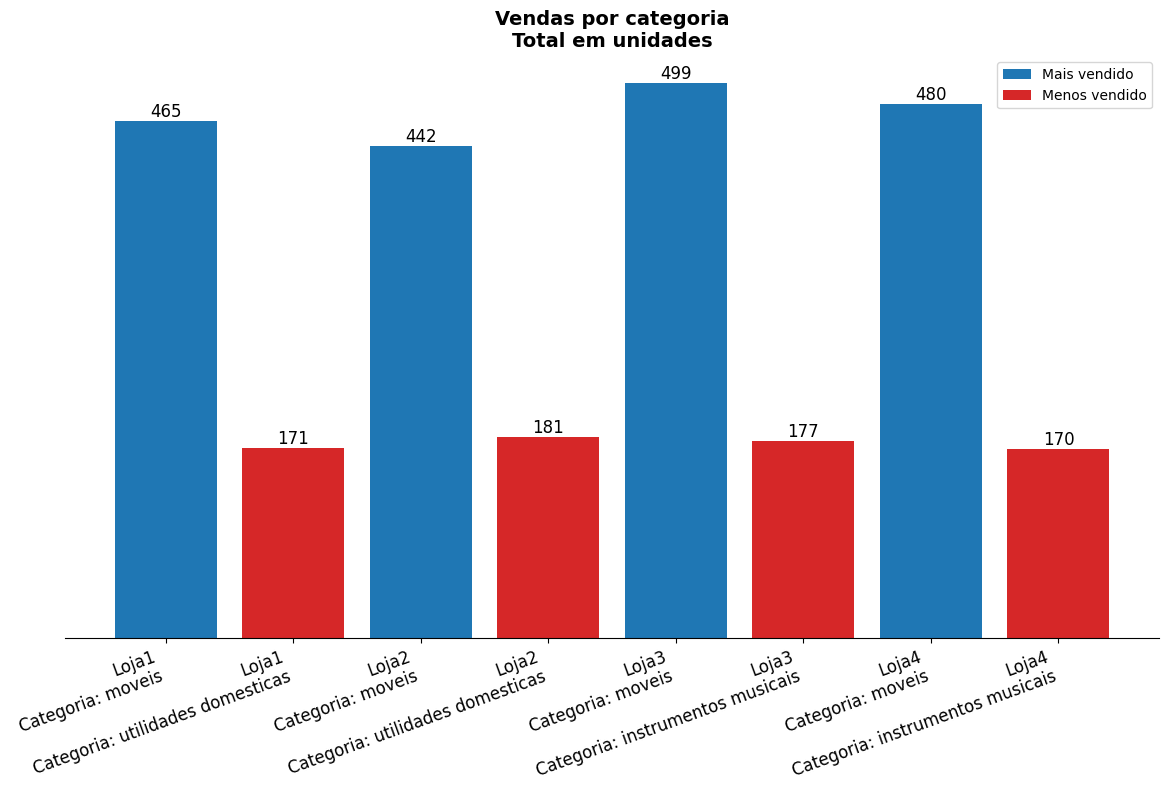

In [14]:
category_data = []
for n_store in categories.keys():
    category_data.extend(most_least_category_sold(categories[n_store], n_store))
plot_category_sell_bar_graph(category_data)

# 3. Média de Avaliação das Lojas

In [15]:
customers_rank = {store_name: round(df['Avaliação da compra'].mean(),2) for store_name, df in stores.items()}
df_customer_rank = (pd.DataFrame(customers_rank.items(), columns=['Loja', 'Avaliação da compra'])
                    .rename(columns={'Avaliação da compra':'Avaliação média'}))

In [16]:
def plot_table_customer_rank(customer_rank_df:pd.DataFrame)->None:
    """  Plot the table average customer rank review for each store """

    customer_rank_df = customer_rank_df.sort_values(by='Avaliação média',ascending=False)

    table = PrettyTable(['Loja', 'Avaliação média' ])
    for _, row in customer_rank_df.iterrows():
        table.add_row([
            row['Loja'],
            row['Avaliação média']
        ])

    title = 'Avaliação média dos cientes'
    table_str = table.get_string()
    width =len(table_str.splitlines()[0])

    print('\n' + title.center(width))
    print(table_str)

In [17]:
plot_table_customer_rank(df_customer_rank)


Avaliação média dos cientes
+-------+-----------------+
|  Loja | Avaliação média |
+-------+-----------------+
| Loja3 |       4.05      |
| Loja2 |       4.04      |
| Loja4 |       4.0       |
| Loja1 |       3.98      |
+-------+-----------------+


## 3. Média de Avaliação das Lojas - Gráfico

In [18]:
def plot_customer_rank_bar_graph(customer_rank_df:pd.DataFrame):
    """  Plot the bar graph average customer rank review for each store """

    customer_rank_df = customer_rank_df.sort_values(by='Avaliação média', ascending=False)
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

    fig, axs = plt.subplots(figsize=(10,6))
    labels = [lbl for lbl in customer_rank_df['Loja']]
    values = [va/1e0 for va in customer_rank_df['Avaliação média']]

    bars = axs.bar(labels, values, color = bar_colors, width=0.4)
    axs.bar_label(bars, fontsize=12)
    axs.set_title('Avaliação média dos clientes por loja', fontsize=14, fontweight= 'bold')

    axs.set_xticks(range(len(labels)))
    axs.set_xticklabels(labels, fontsize=12)

    axs.yaxis.set_visible(False)
    axs.spines[['top', 'left', 'right']].set_visible(False)

    plt.show()

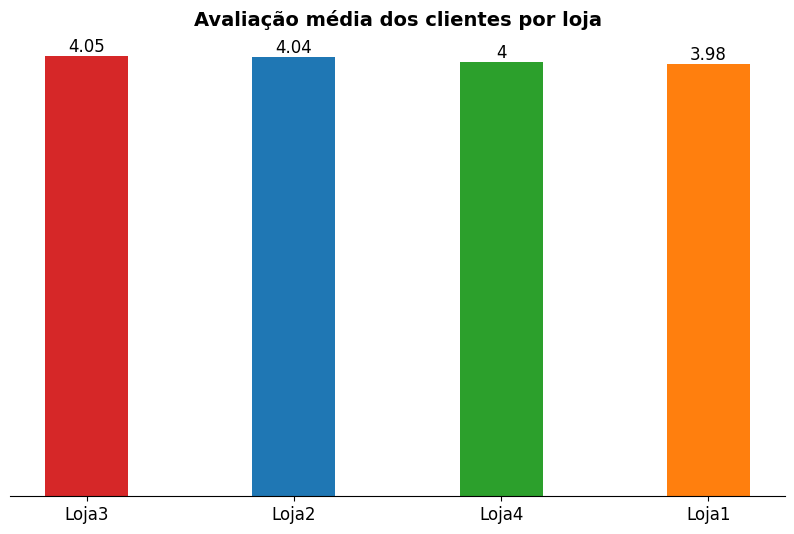

In [19]:
plot_customer_rank_bar_graph(df_customer_rank)

# 4. Produtos Mais e Menos Vendidos

In [20]:
products = {store_name: df.groupby('Produto').size().reset_index(name='Quantidade')
            for store_name, df in stores.items()}

In [21]:
def table_top_tree_sell(dic_products:dict[str, pd.DataFrame]):
    """  Plot a table of the top 3 products most sold """

    for store , df in dic_products.items():
        table = PrettyTable(['Produto', 'Quantidade'])
        top_row = df.nlargest(3,'Quantidade')

        for _, row in top_row.iterrows():
            table.add_row([
                row['Produto'],
                f"{row['Quantidade']}"
            ])
        title = f'Top 3 produtos mais vendidos - {store}'
        table_str = table.get_string()
        width = len(table_str.splitlines()[0])

        print('\n' + title.center(width))
        print(table_str)

In [22]:
plot_table_categories_most_sell(categories)


       Categoria mais vendida       
+-------+-----------+--------------+
|  Loja | Categoria |  Quantidade  |
+-------+-----------+--------------+
| Loja1 |   moveis  | 465 Unidades |
| Loja2 |   moveis  | 442 Unidades |
| Loja3 |   moveis  | 499 Unidades |
| Loja4 |   moveis  | 480 Unidades |
+-------+-----------+--------------+


In [23]:
def table_bottom_tree_sell(dic_products:dict[str, pd.DataFrame]):
    """  Plot a table of the 3 products least sold """

    for store , df in dic_products.items():
        table = PrettyTable(['Produto', 'Quantidade'])
        top_bottom = df.nsmallest(3,'Quantidade')

        for _, row in top_bottom.iterrows():
            table.add_row([
                row['Produto'],
                f"{row['Quantidade']}"
            ])
        title = f' Os 3 produtos menos vendidos - {store}'
        table_str = table.get_string()
        width = len(table_str.splitlines()[0])

        print('\n' + title.center(width))
        print(table_str)

In [24]:
plot_table_categories_least_sell(categories)


            Categoria menos vendida             
+-------+-----------------------+--------------+
|  Loja |       Categoria       |  Quantidade  |
+-------+-----------------------+--------------+
| Loja1 | utilidades domesticas | 171 Unidades |
| Loja2 | utilidades domesticas | 181 Unidades |
| Loja3 | instrumentos musicais | 177 Unidades |
| Loja4 | instrumentos musicais | 170 Unidades |
+-------+-----------------------+--------------+


## 4. Produtos Mais e Menos Vendidos - Gráfico

In [43]:
def frame_top_tree_product_sell(s_products:pd.DataFrame, store_name:str )-> list:
    """ Make a top tree most product sold list """

    top_tree = s_products.nlargest(3,'Quantidade')
    frame = [
        (f"{store_name}\n{row['Produto']}", row['Quantidade'])
         for _, row in top_tree.iterrows()]

    return frame

def plot_product_bar_graph(product_list:list)-> None:
  """ Plot a bar graphic of the 3 products most sold """
  labels, values = zip(*product_list)

  stores_n = [lbl.split('\n')[0] for lbl in labels]
  stores_order = sorted(set(stores_n))
  color_map = {s: plt.cm.tab10(i) for i, s in enumerate(stores_order)}
  colors = [color_map[s] for s in stores_n]

  fig, axs = plt.subplots(figsize=(12,10))

  bars = axs.bar(labels, values, color = colors, width=0.6)
  axs.bar_label(bars, fontsize=12)
  axs.set_title('Produtos com maior número de unidades vendidas\n Top 3', fontsize=14, fontweight='bold')
  axs.spines[['top', 'left', 'right']].set_visible(False)
  axs.yaxis.set_visible(False)

  axs.set_xticks(range(len(labels)))
  axs.set_xticklabels(labels, rotation=30, ha='right')

  legends = [Patch(color=cor, label=loja) for loja, cor in color_map.items()]
  axs.legend(handles=legends, title='Lojas', loc="upper right")

  plt.show()

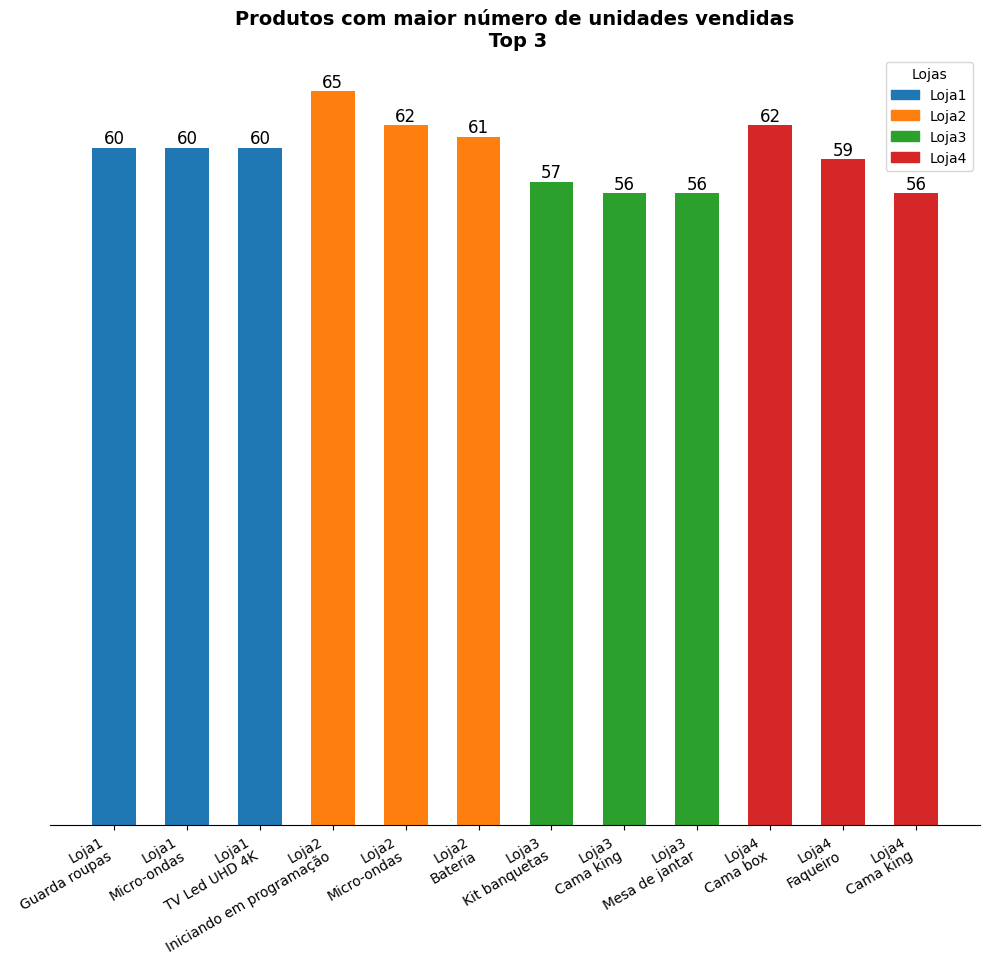

In [44]:
product_data = []
for store in products.keys():
    product_data.extend(frame_top_tree_product_sell(products[store], store))
plot_product_bar_graph(product_data)

# 5. Frete Médio por Loja


In [27]:
store_fare = {store_name: round(df['Frete'].mean()) for store_name, df in stores.items()}
df_store_fare = pd.DataFrame(store_fare.items(), columns=['Loja', 'Frete'])

In [28]:
def plot_store_fare_table(store_fare_df:pd.DataFrame):
    """ Plot the average store fare for each store """

    table = PrettyTable(['Loja', 'Frete'])

    for _, row in store_fare_df.iterrows():
        table.add_row([
            row['Loja'],
            f"R${row['Frete']:,.2f}".replace('.' ,',')
        ])

    title = 'Custo médio do frete por loja'
    table_str = table.get_string()
    width = len(table_str.splitlines()[0])

    print('\n' + title.center(width))
    print(table_str)

In [29]:
plot_store_fare_table(df_store_fare)


Custo médio do frete por loja
+-------+---------+
|  Loja |  Frete  |
+-------+---------+
| Loja1 | R$35,00 |
| Loja2 | R$34,00 |
| Loja3 | R$33,00 |
| Loja4 | R$31,00 |
+-------+---------+


In [30]:
def plot_store_fare_bar_plot(store_fare_df:pd.DataFrame)->None:
    fig, axs = plt.subplots(figsize=(8,5))
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

    labels = [lbl for lbl in store_fare_df['Loja']]
    values = [val/1e0 for val in store_fare_df['Frete']]

    bars = axs.bar(labels, values, color=bar_colors, width=0.5)
    axs.bar_label(bars, labels=[f'R${vl:.2f}' for vl in values], fontsize=12)
    axs.set_title('Custo médio do frete por loja', fontsize = 14, fontweight= 'bold')

    axs.set_xticks(range(len(labels)))
    axs.set_xticklabels(labels, fontsize=12)

    axs.yaxis.set_visible(False)
    axs.spines[['top', 'left', 'right']].set_visible(False)

    plt.show()

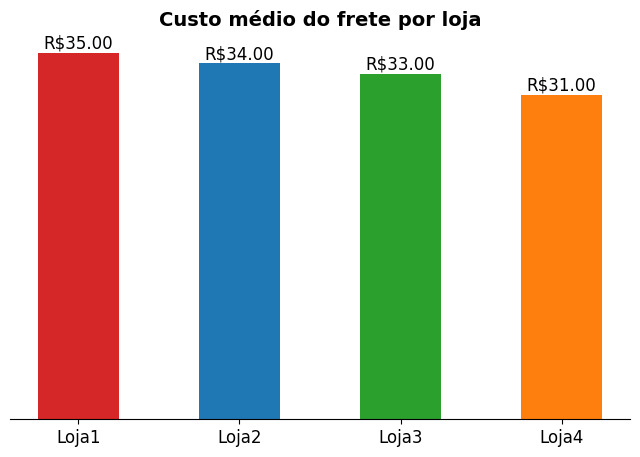

In [31]:
plot_store_fare_bar_plot(df_store_fare)

# 6. Faturamento líquido médio por loja

In [32]:
net_revenue = {store_name: (df['Preço']-df['Frete']).mean()
                for store_name, df in stores.items()}
df_net_revenue = pd.DataFrame(list(net_revenue.items()), columns = ['Loja', 'Faturamento líquido médio'])

In [33]:
def plot_table_net_revenue(net_revenue_df:pd.DataFrame)-> None:
    """ Plot a net revenue of each store table """

    net_revenue_df = net_revenue_df.sort_values(by='Faturamento líquido médio', ascending=False)

    table = PrettyTable(['Loja', 'Faturamento líquido médio'])
    for _, row in net_revenue_df.iterrows():
        table.add_row([
            row['Loja'],
            f"R${row['Faturamento líquido médio']:,.2f}".replace('.', ',')
        ])
    title = 'Faturamento líquido médio por loja'
    table_str = table.get_string()
    width = len(table_str.splitlines()[0])

    print('\n' + title.center(width))
    print(table_str)


In [34]:
plot_table_net_revenue(df_net_revenue)


  Faturamento líquido médio por loja 
+-------+---------------------------+
|  Loja | Faturamento líquido médio |
+-------+---------------------------+
| Loja1 |          R$615,80         |
| Loja2 |          R$597,35         |
| Loja3 |          R$587,54         |
| Loja4 |          R$555,87         |
+-------+---------------------------+


##6. Faturamento líquido médio por loja - Gráfico

In [35]:
def plot_bar_net_revenue(net_revenue_df:pd.DataFrame):
    """ Plot a bar graph net revenue of each store table """

    net_revenue_df = net_revenue_df.sort_values(by='Faturamento líquido médio', ascending=False)
    fig, axs = plt.subplots(figsize=(8, 5))
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

    labels = [lbl for lbl in net_revenue_df['Loja']]
    values = [val / 1e0 for val in net_revenue_df['Faturamento líquido médio']]

    bars = axs.bar(labels, values, color=bar_colors, width=0.8)
    axs.bar_label(bars, labels=[f'R${vl:.2f}' for vl in values], fontsize=12)
    axs.set_title('Faturamento líquido médio por loja', fontsize=14, fontweight='bold')

    axs.set_xticks(range(len(labels)))
    axs.set_xticklabels(labels, fontsize=12)

    axs.yaxis.set_visible(False)
    axs.spines[['top', 'left', 'right']].set_visible(False)

    plt.show()

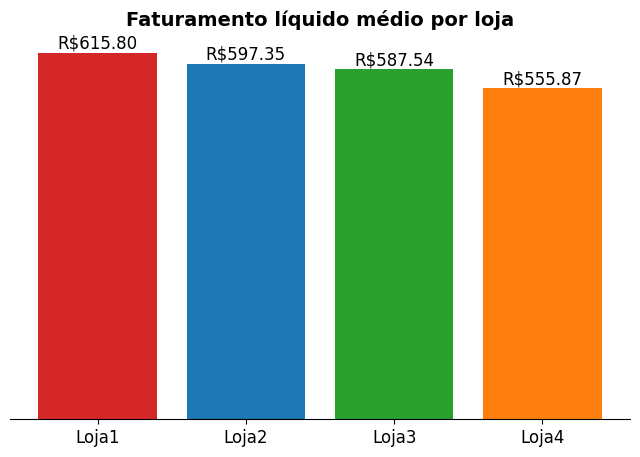

In [36]:
plot_bar_net_revenue(df_net_revenue)

# 7. Conclusão
## 1. Análise do faturamento
* A loja 1 lidera em faturamento bruto e faturamento líquido.  
* A loja 4 é a que apresenta **pior desempenho** em ambos os quesitos.

## 2. Análise de venda por categoria e produtos
* Categoria com maior número de vendas: <strong>móveis</strong>, com destaque para a loja 3.  
* Categoria com o pior desempenho de vendas: <strong>utilidades domésticas</strong> nas lojas 1 e 2 e <strong>instrumentos musicais</strong> nas lojas 3 e 4 — sendo a loja 4 a que apresenta **o pior desempenho** entre todas.

## 3. Análise da experiência do cliente
* Loja 3 lidera em satisfação.  
* Loja 1 apresenta a pior nota; porém, é a que gera mais lucro, indicando que uma melhora na logística e no atendimento pós-venda **pode** elevar sua avaliação.

## 4. Análise do custo do frete
* A loja 4 apresenta o menor custo de frete, mas isso não se reflete em maior lucro nem em maior satisfação do cliente.  
* A loja 1 apresenta o maior custo de frete, porém **é** a loja que gera maior lucro.

## RESUMO
* **Loja 1** – <strong>pontos positivos:</strong> maior faturamento. <strong>pontos negativos:</strong> frete mais caro e menor nota de satisfação do cliente.  
* **Loja 2** – <strong>pontos positivos:</strong> boa avaliação e bom faturamento. <strong>pontos negativos:</strong> baixo giro de estoque do item «jogo de tabuleiro».  
* **Loja 3** – <strong>pontos positivos:</strong> melhor avaliação e bom faturamento. <strong>pontos negativos:</strong> faturamento um pouco abaixo das lojas 1 e 2.  
* **Loja 4** – <strong>pontos positivos:</strong> frete mais barato. <strong>pontos negativos:</strong> menor faturamento, baixa saída de instrumentos musicais e avaliação mediana.

## Recomendação de venda
### <em>Loja 4</em>
A loja 4 possui **desempenho** financeiro inferior às demais, baixo giro de estoque em instrumentos musicais e, apesar do frete mais barato, isso **não indica** maior satisfação dos clientes.
